In [1]:
import pandas as pd


def load_feather(path):
    return pd.read_feather(path)
!pip install pyarrow
DATA_PATH = '/home/workspace/data/.train/.task149/train/train_d.feather'
data=load_feather(DATA_PATH)

  Using cached pyarrow-2.0.0-cp38-cp38-manylinux2014_x86_64.whl (17.8 MB)
  Using cached numpy-1.19.4-cp38-cp38-manylinux2010_x86_64.whl (14.5 MB)


In [2]:
data_1=data.sort_values(by=['승인일자'], axis=0)
#data_2=data_1.dropna()#
data_3=data_1.rename(columns = {"승인일자": "time", "매출금액": "sales"})
grouped=data_3.groupby(['time', 'a']).sales.sum()
data_a=grouped.to_frame()
import numpy as np
tmp=data_a.reset_index()
tmp

,time,a,sales
0,20190101,1,7577750
1,20190101,2,65263700
2,20190101,3,78528480
3,20190101,4,44042873
4,20190101,5,5548200
...,...,...,...
2885,20200731,1,39195187
2886,20200731,2,166280704
2887,20200731,3,172578084
2888,20200731,4,133779293


In [3]:
tmp.index=np.repeat(pd.date_range('2019-01-01',periods=578),5)
tmp 


,time,a,sales
2019-01-01,20190101,1,7577750
2019-01-01,20190101,2,65263700
2019-01-01,20190101,3,78528480
2019-01-01,20190101,4,44042873
2019-01-01,20190101,5,5548200
...,...,...,...
2020-07-31,20200731,1,39195187
2020-07-31,20200731,2,166280704
2020-07-31,20200731,3,172578084
2020-07-31,20200731,4,133779293


In [4]:
tmp1=tmp.drop('time',axis=1)

<AxesSubplot:>

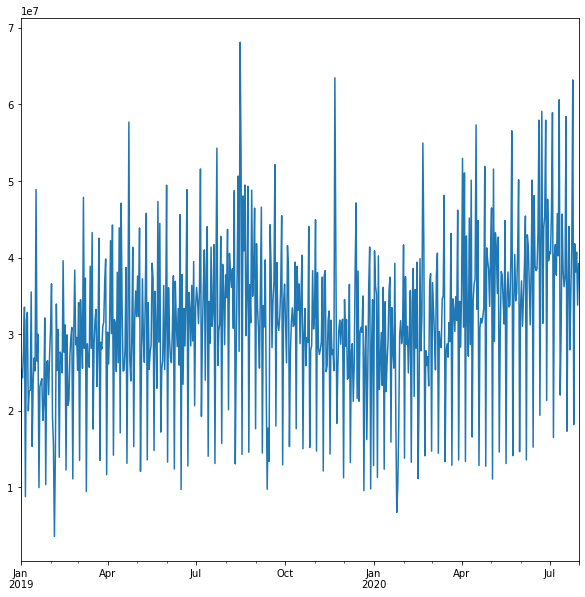

In [5]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==1]['sales'].plot()

<AxesSubplot:>

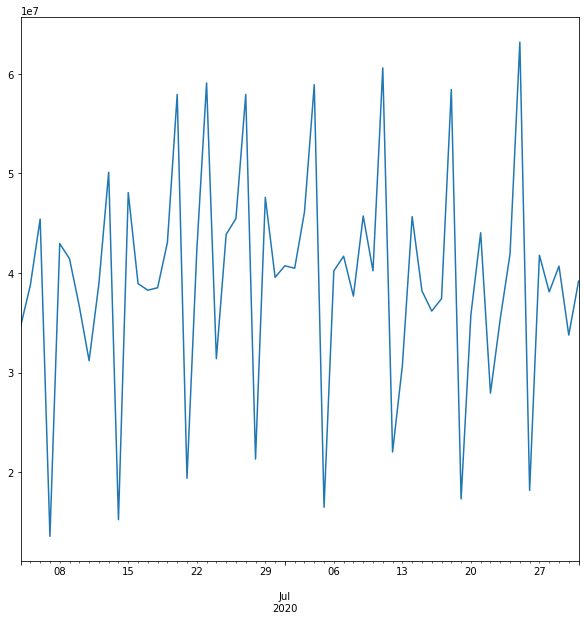

In [6]:
tmp1[tmp1.a==1]['sales'][520:580].plot()

#2019-02-05     np.mean([10350910,13911060])   2019-01-27       2019-02-10   
#2019-08-16    np.mean([50637421,48038488])  2019-08-14      2019-08-19    
#2019-11-22    np.mean([44926120,47128269])  2019-11-02      2019-12-14    

In [7]:
tmp1[tmp1.a==1]['sales'][520:580]

2020-06-04    34634386
2020-06-05    38791450
2020-06-06    45421910
2020-06-07    13575705
2020-06-08    42956767
2020-06-09    41435264
2020-06-10    36663539
2020-06-11    31207742
2020-06-12    38924202
2020-06-13    50115369
2020-06-14    15238900
2020-06-15    48080032
2020-06-16    38937468
2020-06-17    38279530
2020-06-18    38527869
2020-06-19    43068982
2020-06-20    57936203
2020-06-21    19400470
2020-06-22    42251140
2020-06-23    59086485
2020-06-24    31399805
2020-06-25    43876464
2020-06-26    45477522
2020-06-27    57932183
2020-06-28    21329660
2020-06-29    47600651
2020-06-30    39570939
2020-07-01    40730585
2020-07-02    40481802
2020-07-03    46127218
2020-07-04    58915550
2020-07-05    16487245
2020-07-06    40225198
2020-07-07    41693806
2020-07-08    37687655
2020-07-09    45728684
2020-07-10    40223129
2020-07-11    60595436
2020-07-12    22037850
2020-07-13    30700861
2020-07-14    45666595
2020-07-15    38215665
2020-07-16    36183878
2020-07-17 

In [8]:
tmp1[tmp1.a==1]['sales'][300:360]

2019-10-28    27911462
2019-10-29    28488156
2019-10-30    38278745
2019-10-31    30659930
2019-11-01    32499619
2019-11-02    44926120
2019-11-03    14731650
2019-11-04    38035579
2019-11-05    28187903
2019-11-06    27335219
2019-11-07    28026594
2019-11-08    28954506
2019-11-09    37444102
2019-11-10    12123110
2019-11-11    37661938
2019-11-12    38288358
2019-11-13    25097624
2019-11-14    25895714
2019-11-15    31810217
2019-11-16    33014705
2019-11-17    14339180
2019-11-18    31823127
2019-11-19    27320117
2019-11-20    27923401
2019-11-21    25220564
2019-11-22    63463611
2019-11-23    39882715
2019-11-24    18339620
2019-11-25    25121038
2019-11-26    30404955
2019-11-27    31837906
2019-11-28    28682689
2019-11-29    31456807
2019-11-30    31944498
2019-12-01    11234985
2019-12-02    34508081
2019-12-03    28408901
2019-12-04    31899785
2019-12-05    24104572
2019-12-06    24290441
2019-12-07    36490796
2019-12-08    13223621
2019-12-09    27741051
2019-12-10 

In [9]:
a1=tmp1[tmp1.a==1]

In [10]:
a1.loc['2019-02-05']    =[1,np.mean([10350910,13911060])]
a1.loc['2019-08-16']   = [1,np.mean([50637421,48038488])] 
a1.loc['2019-11-22']    =[1,np.mean([44926120,47128269])]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


<AxesSubplot:>

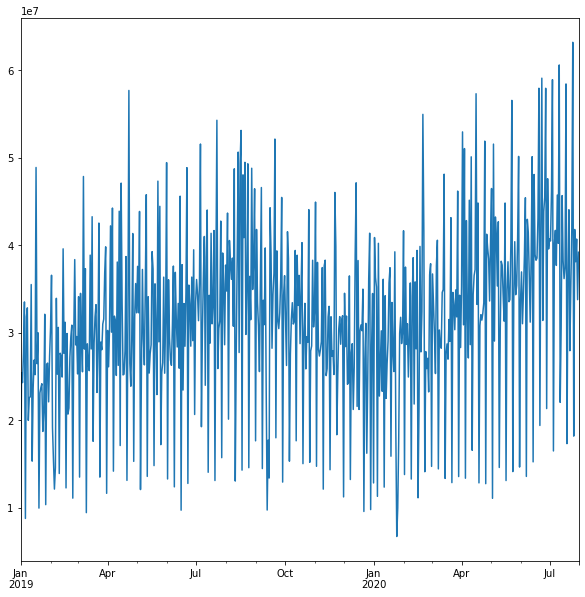

In [11]:
a1['sales'].plot()

<AxesSubplot:>

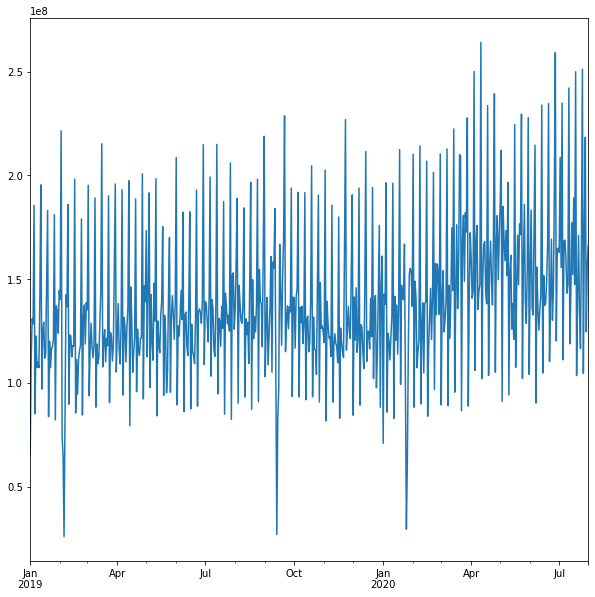

In [12]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==2]['sales'].plot()

<AxesSubplot:>

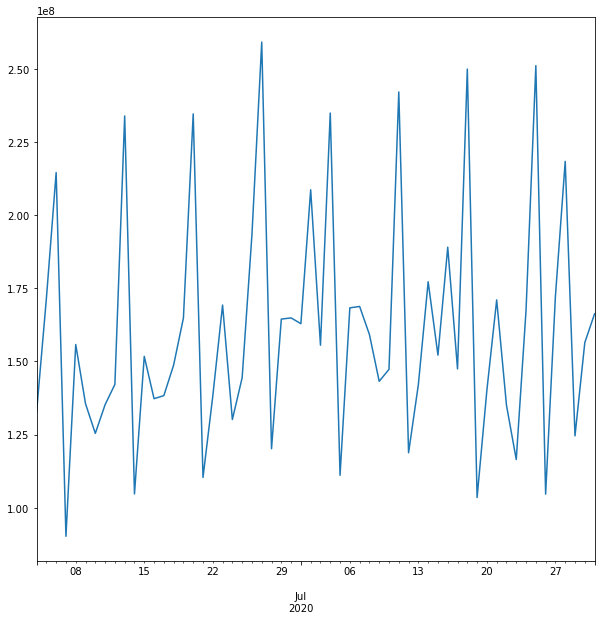

In [13]:
tmp1[tmp1.a==2]['sales'][520:580].plot()
#2019-02-05     93930984  2019-02-06     83930984 2019-02-07    142442881
#2019-09-13     np.mean([105075093, 118124362]) 2019-09-08     2019-09-18   
#2020-01-25     np.mean([99299950, 88239751])   2020-01-19       2020-02-02    

In [14]:
tmp1[tmp1.a==2]['sales'][520:580]

2020-06-04    132664157
2020-06-05    171434794
2020-06-06    214545695
2020-06-07     90236173
2020-06-08    155785998
2020-06-09    135529652
2020-06-10    125416408
2020-06-11    135217732
2020-06-12    142151818
2020-06-13    233889754
2020-06-14    104728567
2020-06-15    151738823
2020-06-16    137268443
2020-06-17    138312281
2020-06-18    148764303
2020-06-19    164838824
2020-06-20    234604840
2020-06-21    110344980
2020-06-22    138139266
2020-06-23    169277610
2020-06-24    130145262
2020-06-25    144426165
2020-06-26    193330300
2020-06-27    259137875
2020-06-28    120160329
2020-06-29    164470261
2020-06-30    164877487
2020-07-01    162898645
2020-07-02    208671838
2020-07-03    155550432
2020-07-04    234891160
2020-07-05    111084274
2020-07-06    168309355
2020-07-07    168795669
2020-07-08    159210578
2020-07-09    143204992
2020-07-10    147300821
2020-07-11    242091713
2020-07-12    118787040
2020-07-13    142086065
2020-07-14    177230614
2020-07-15    15

In [15]:
tmp1[tmp1.a==2]['sales'][360:420]

2019-12-27    145911358
2019-12-28    175874771
2019-12-29     88256293
2019-12-30    146577570
2019-12-31    161116638
2020-01-01     70863337
2020-01-02    142754657
2020-01-03    137869906
2020-01-04    196389792
2020-01-05     85878735
2020-01-06    123875286
2020-01-07    120199882
2020-01-08    111062195
2020-01-09    122407458
2020-01-10    131954353
2020-01-11    196213855
2020-01-12     82853205
2020-01-13    141712835
2020-01-14    120505144
2020-01-15    137452829
2020-01-16    113848052
2020-01-17    138336006
2020-01-18    212376101
2020-01-19     99299950
2020-01-20    147012429
2020-01-21    140784625
2020-01-22    140087572
2020-01-23    166853956
2020-01-24     95415604
2020-01-25     29485270
2020-01-26     61912430
2020-01-27    117151066
2020-01-28    152214926
2020-01-29    155200364
2020-01-30    153726862
2020-01-31    136870223
2020-02-01    210115950
2020-02-02     88239751
2020-02-03    148989694
2020-02-04    140270604
2020-02-05    107263893
2020-02-06    11

In [16]:
a2=tmp1[tmp1.a==2]

In [17]:
a2.loc['2019-02-05']    = [2,93930984]
a2.loc['2019-09-13']     =[2,np.mean([105075093, 118124362])]
a2.loc['2020-01-25']     =[2,np.mean([99299950, 88239751])]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-17-d845f10f47c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a2.loc['2019-02-05']    = [2,93930984]
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

<AxesSubplot:>

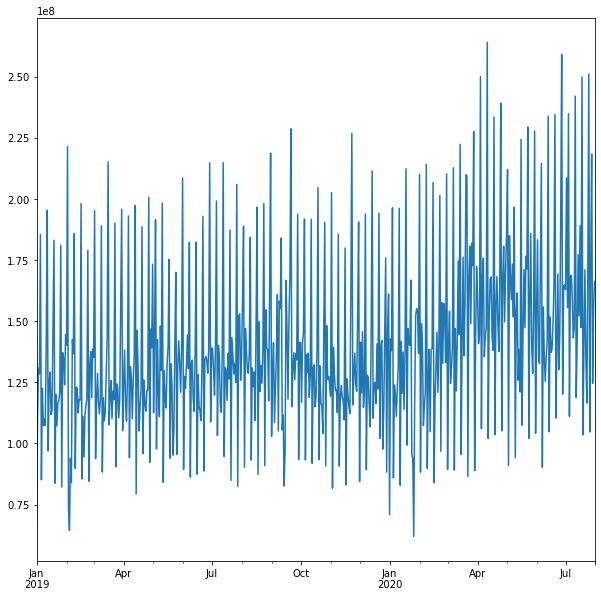

In [18]:
a2['sales'].plot()

<AxesSubplot:>

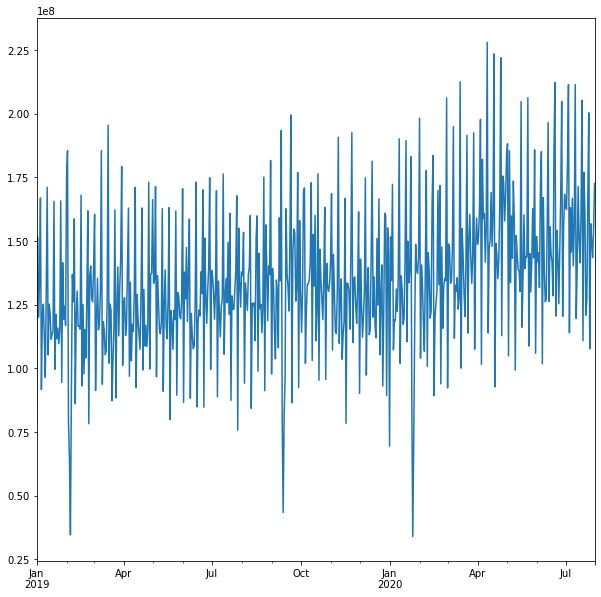

In [19]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==3]['sales'].plot()

<AxesSubplot:>

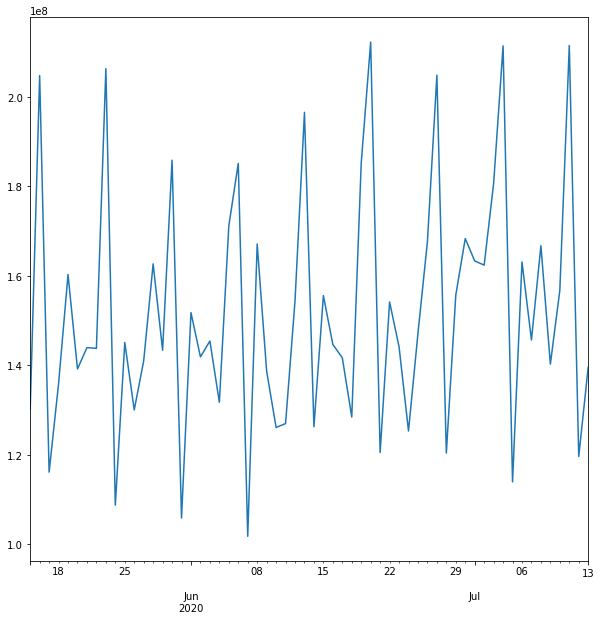

In [20]:
tmp1[tmp1.a==3]['sales'][500:560].plot()
#2019-02-05    np.mean([94487622 ,86096429])   2019-01-27       2019-02-10     
#2019-09-13     np.mean([108039165,86422772])   2019-09-08      2019-09-22  
#2020-01-25     np.mean([110447375,104036101])  2020-01-19      2020-02-02    

In [21]:
tmp1[tmp1.a==3]['sales'][500:560]

2020-05-15    130194016
2020-05-16    204737720
2020-05-17    116139570
2020-05-18    135893652
2020-05-19    160291327
2020-05-20    139187492
2020-05-21    143961200
2020-05-22    143793749
2020-05-23    206285218
2020-05-24    108747959
2020-05-25    145106072
2020-05-26    130032707
2020-05-27    141004693
2020-05-28    162668738
2020-05-29    143373082
2020-05-30    185825745
2020-05-31    105891304
2020-06-01    151777126
2020-06-02    141883012
2020-06-03    145430389
2020-06-04    131736843
2020-06-05    171133979
2020-06-06    185123743
2020-06-07    101803314
2020-06-08    167099383
2020-06-09    138695286
2020-06-10    126114626
2020-06-11    126980829
2020-06-12    154358427
2020-06-13    196521866
2020-06-14    126273202
2020-06-15    155581155
2020-06-16    144653154
2020-06-17    141689913
2020-06-18    128454483
2020-06-19    185201004
2020-06-20    212211521
2020-06-21    120521831
2020-06-22    154156170
2020-06-23    144147367
2020-06-24    125327931
2020-06-25    14

In [22]:
tmp1[tmp1.a==3]['sales'][360:420]

2019-12-27    160945790
2019-12-28    159905404
2019-12-29     89289787
2019-12-30    155145246
2019-12-31    145838965
2020-01-01     69450904
2020-01-02    151606625
2020-01-03    134502876
2020-01-04    172271370
2020-01-05    107276035
2020-01-06    119093168
2020-01-07    118632449
2020-01-08    131134624
2020-01-09    122346495
2020-01-10    135375888
2020-01-11    190136711
2020-01-12    101927913
2020-01-13    136307733
2020-01-14    131330135
2020-01-15    117307141
2020-01-16    119488521
2020-01-17    142354559
2020-01-18    189402349
2020-01-19    110447375
2020-01-20    149941350
2020-01-21    133605200
2020-01-22    138380005
2020-01-23    183150610
2020-01-24     88314689
2020-01-25     33963973
2020-01-26     71769584
2020-01-27    116254261
2020-01-28    148694093
2020-01-29    138558838
2020-01-30    137279374
2020-01-31    143796271
2020-02-01    198164103
2020-02-02    104036101
2020-02-03    140595635
2020-02-04    132778538
2020-02-05    118009658
2020-02-06    10

In [23]:
a3=tmp1[tmp1.a==3]

In [24]:
a3.loc['2019-02-05']    =[3,np.mean([94487622 ,86096429])]
a3.loc['2019-09-13']     =[3,np.mean([108039165,86422772])]
a3.loc['2020-01-25']     =[3,np.mean([110447375,104036101])]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


<AxesSubplot:>

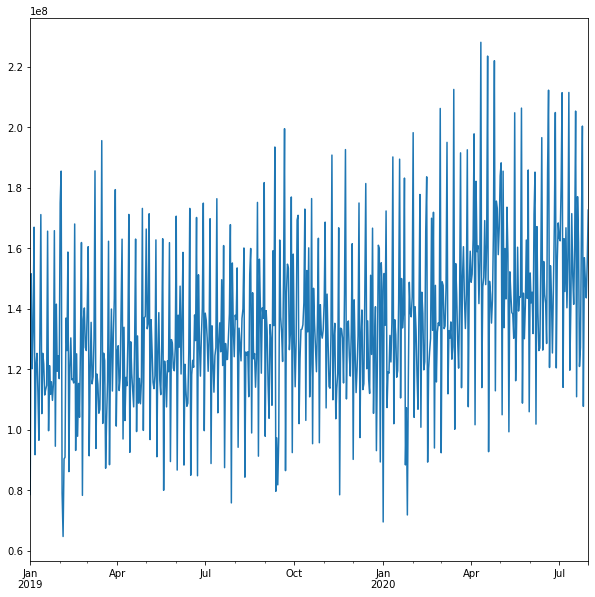

In [25]:
a3['sales'].plot()

<AxesSubplot:>

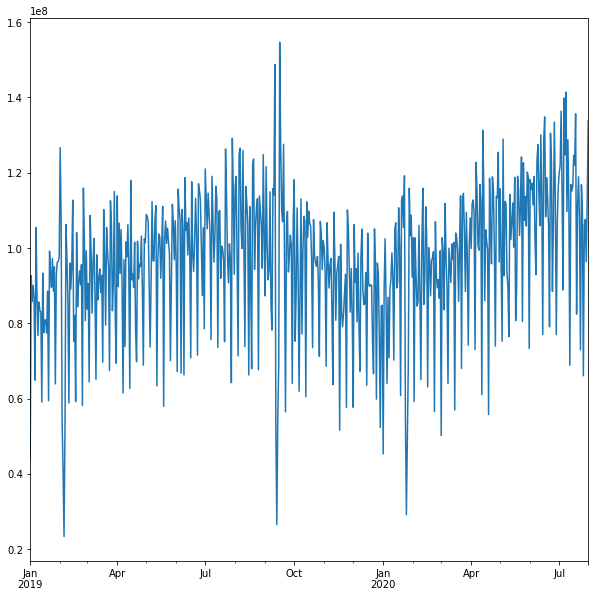

In [26]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==4]['sales'].plot()

<AxesSubplot:>

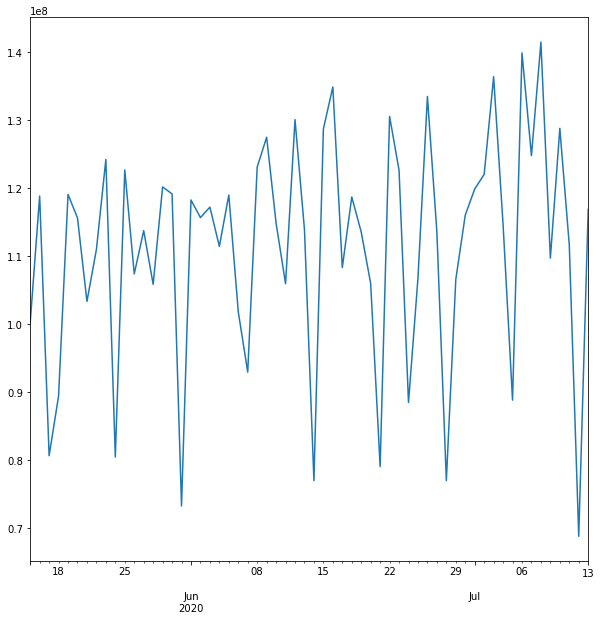

In [27]:
tmp1[tmp1.a==4]['sales'][500:560].plot()
#2019-02-05     np.mean([63895140,58822430])   2019-01-27       2019-02-10 
#2019-02-04     58822430 2019-02-10     
#2019-09-11    128749983
#2019-09-13     66529742
#2019-09-14     74624650
#2019-09-15     89030229
#2019-09-16    134662181
#2020-01-24     65367048
#2020-01-25     49151505
#2020-01-26     60354504
#2020-01-27     79414286

In [28]:
tmp1[tmp1.a==4]['sales'][520:580]

2020-06-04    111427012
2020-06-05    118969733
2020-06-06    101813635
2020-06-07     92941247
2020-06-08    123072803
2020-06-09    127462122
2020-06-10    114831647
2020-06-11    105935522
2020-06-12    130051582
2020-06-13    113882134
2020-06-14     76992595
2020-06-15    128680042
2020-06-16    134851234
2020-06-17    108300900
2020-06-18    118684445
2020-06-19    113526066
2020-06-20    105969020
2020-06-21     79062155
2020-06-22    130523363
2020-06-23    122620373
2020-06-24     88490273
2020-06-25    106756931
2020-06-26    133456659
2020-06-27    113545224
2020-06-28     76998705
2020-06-29    106567275
2020-06-30    116011589
2020-07-01    119857170
2020-07-02    122004315
2020-07-03    136355132
2020-07-04    114608723
2020-07-05     88833160
2020-07-06    139855844
2020-07-07    124764223
2020-07-08    141440428
2020-07-09    109693439
2020-07-10    128766692
2020-07-11    111614605
2020-07-12     68822024
2020-07-13    116871385
2020-07-14    115098568
2020-07-15    11

In [29]:
tmp1[tmp1.a==4]['sales'][360:420]

2019-12-27     92951898
2019-12-28     77049198
2019-12-29     52298689
2019-12-30     84540725
2019-12-31     84791525
2020-01-01     45290100
2020-01-02     89277984
2020-01-03    102441888
2020-01-04     85433780
2020-01-05     64033988
2020-01-06     86897874
2020-01-07     70829820
2020-01-08     89124160
2020-01-09     91569544
2020-01-10     98693460
2020-01-11     91954158
2020-01-12     70205660
2020-01-13    104945805
2020-01-14    106692787
2020-01-15     89397185
2020-01-16     91010195
2020-01-17    110688916
2020-01-18    100295234
2020-01-19     60767460
2020-01-20    112430605
2020-01-21    113822090
2020-01-22    105523985
2020-01-23    119181400
2020-01-24     55367048
2020-01-25     29151505
2020-01-26     50354504
2020-01-27     69414286
2020-01-28    115891487
2020-01-29    103272135
2020-01-30    108743515
2020-01-31     92284294
2020-02-01    102714298
2020-02-02     59218666
2020-02-03    102708025
2020-02-04     92459054
2020-02-05     84566390
2020-02-06     8

In [30]:
a4=tmp1[tmp1.a==4]

In [31]:
np.mean([63895140,58822430])

61358785.0

In [32]:
a4.loc['2019-02-05']     =[4,np.mean([63895140,58822430])]
a4.loc['2019-02-04']     =[4,58822430]
a4.loc['2019-09-11']=    [4,128749983]
a4.loc['2019-09-13']    = [4,66529742]
a4.loc['2019-09-14']    = [4,74624650]
a4.loc['2019-09-15']    = [4,89030229]
a4.loc['2019-09-16']   = [4,134662181]
a4.loc['2020-01-24']=    [4,65367048]
a4.loc['2020-01-25']    =[ 4,49151505]
a4.loc['2020-01-26']     =[4,60354504]
a4.loc['2020-01-27']     =[4,79414286]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


<AxesSubplot:>

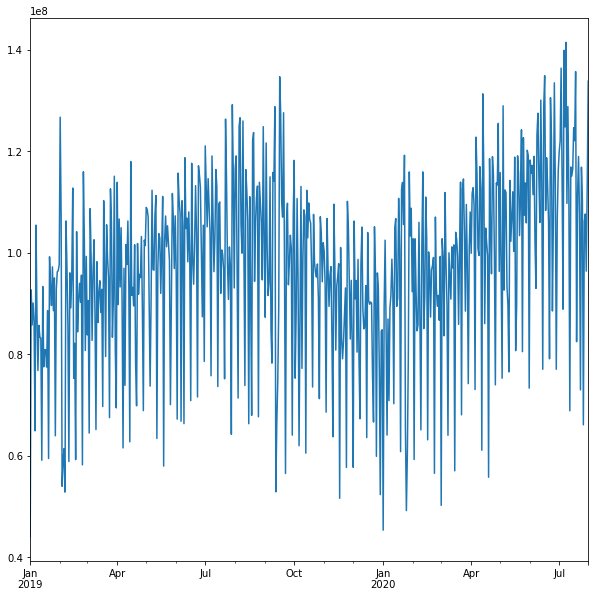

In [33]:
a4['sales'].plot()

<AxesSubplot:>

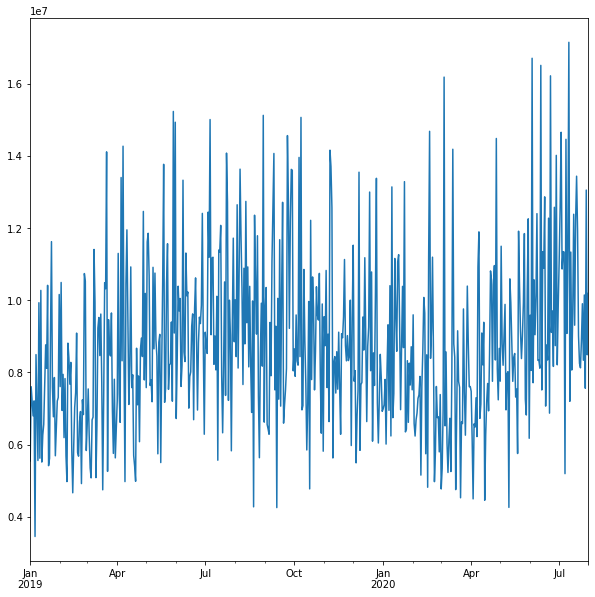

In [34]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==5]['sales'].plot()

<AxesSubplot:>

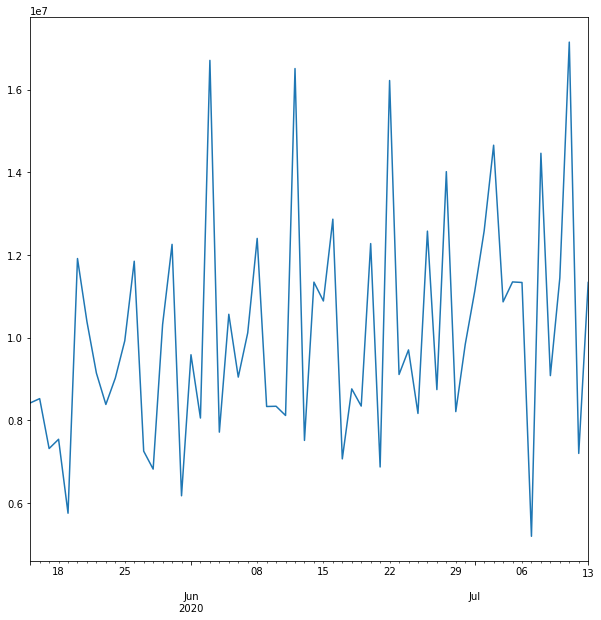

In [35]:
tmp1[tmp1.a==5]['sales'][500:560].plot()
#2019-01-06     5454150 

In [36]:
tmp1[tmp1.a==5]['sales'][500:560]

2020-05-15     8419850
2020-05-16     8524601
2020-05-17     7317260
2020-05-18     7541300
2020-05-19     5753173
2020-05-20    11912730
2020-05-21    10385526
2020-05-22     9141699
2020-05-23     8383573
2020-05-24     9022470
2020-05-25     9923660
2020-05-26    11847100
2020-05-27     7254220
2020-05-28     6820220
2020-05-29    10316640
2020-05-30    12255390
2020-05-31     6175110
2020-06-01     9585760
2020-06-02     8055050
2020-06-03    16704220
2020-06-04     7714122
2020-06-05    10564450
2020-06-06     9045068
2020-06-07    10115720
2020-06-08    12399140
2020-06-09     8333950
2020-06-10     8340090
2020-06-11     8117220
2020-06-12    16507100
2020-06-13     7513820
2020-06-14    11341645
2020-06-15    10885900
2020-06-16    12864160
2020-06-17     7067360
2020-06-18     8760030
2020-06-19     8344294
2020-06-20    12273980
2020-06-21     6871579
2020-06-22    16217513
2020-06-23     9108410
2020-06-24     9702670
2020-06-25     8166240
2020-06-26    12575220
2020-06-27 

In [37]:
tmp1[tmp1.a==5]['sales'][:60]

2019-01-01     5548200
2019-01-02     7604469
2019-01-03     7203880
2019-01-04     6796699
2019-01-05     7211530
2019-01-06     3454150
2019-01-07     8493840
2019-01-08     7082432
2019-01-09     5560010
2019-01-10     9931040
2019-01-11     5623290
2019-01-12    10272270
2019-01-13     5516340
2019-01-14     6262190
2019-01-15     6562390
2019-01-16     7721565
2019-01-17     8764310
2019-01-18     8113760
2019-01-19    10412860
2019-01-20     5416634
2019-01-21     5619560
2019-01-22     9077170
2019-01-23    11623646
2019-01-24     7591205
2019-01-25     6770390
2019-01-26     7858462
2019-01-27     5690705
2019-01-28     6456165
2019-01-29     7208580
2019-01-30     7305070
2019-01-31    10159076
2019-02-01     7607260
2019-02-02    10492280
2019-02-03     6946140
2019-02-04     7945862
2019-02-05     6193355
2019-02-06     7829560
2019-02-07     5690640
2019-02-08     4975130
2019-02-09     8810657
2019-02-10     8400400
2019-02-11     7674925
2019-02-12     8278230
2019-02-13 

In [38]:
a5=tmp1[tmp1.a==5]

In [39]:
a5.loc['2019-01-06']   =  [5,5454150 ]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-39-bb32fda07f8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a5.loc['2019-01-06']   =  [5,5454150 ]


<AxesSubplot:>

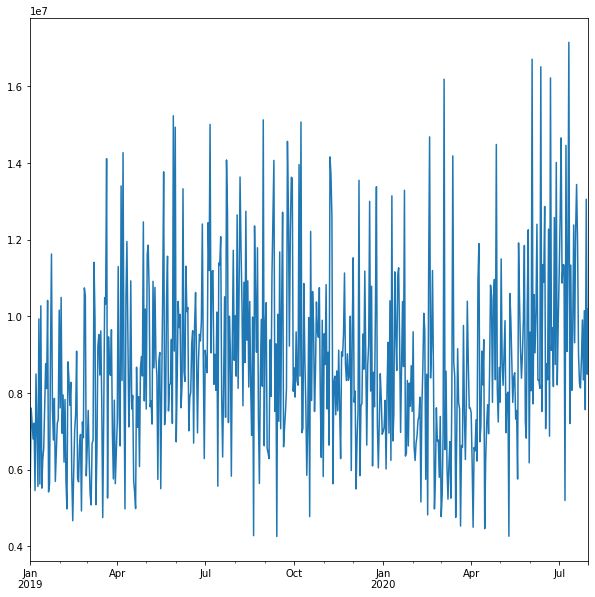

In [40]:
a5['sales'].plot()

In [41]:
a1.to_csv("d_business_time1_edit.csv")
a2.to_csv("d_business_time2_edit.csv")
a3.to_csv("d_business_time3_edit.csv")
a4.to_csv("d_business_time4_edit.csv")
a5.to_csv("d_business_time5_edit.csv")

<AxesSubplot:>

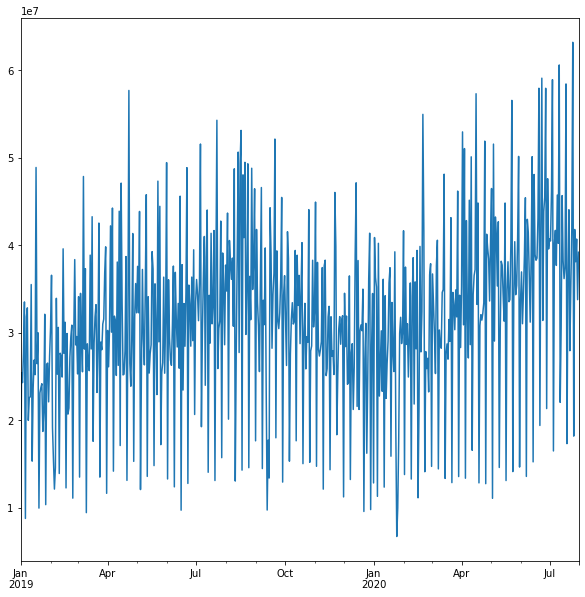

In [42]:
a1['sales'].plot()

<AxesSubplot:>

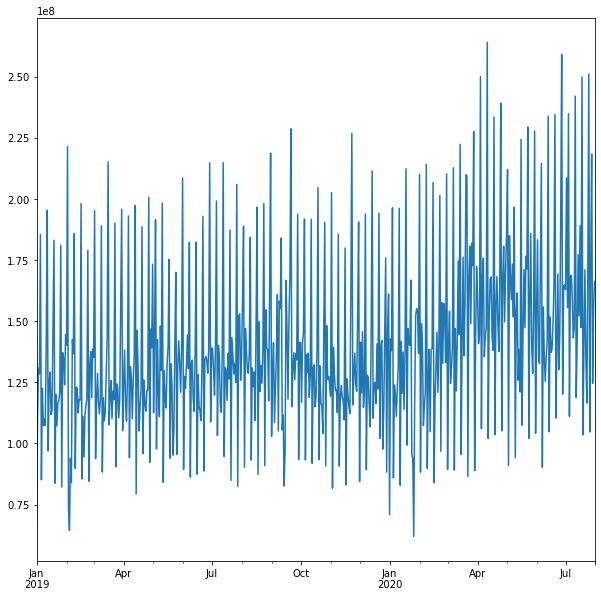

In [43]:
a2['sales'].plot()